
=== Q1: Letter Frequency Vectors ===
                    a   b   c   d    e   f   g    h    i  j   k   l   m    n    o   p  q   r    s    t   u   v   w  x   y  z
Fern Hill         176  28  26  91  217  38  65  145  115  1  13  93  51  156  109  24  0  89  130  141  40  11  49  2  50  0
The New Colossus   31   7   9  26   74  11  13   30   34  0   3  21  24   28   37   8  1  36   35   39  10   1  12  1   9  1
A Grace            22   5  10   2   31   6   7   14   30  0   3  12  12   29   20   2  0   9   17   37   6   2   7  1   7  0

=== Q2: Euclidean Distance (Letters) ===
                  Fern Hill  The New Colossus   A Grace
Fern Hill            0.0000          351.8196  404.1596
The New Colossus   351.8196            0.0000   67.0820
A Grace            404.1596           67.0820    0.0000

=== Q2: Cosine Similarity (Letters) ===
                  Fern Hill  The New Colossus   A Grace
Fern Hill          1.000000          0.965115  0.935573
The New Colossus   0.965115          1.0000

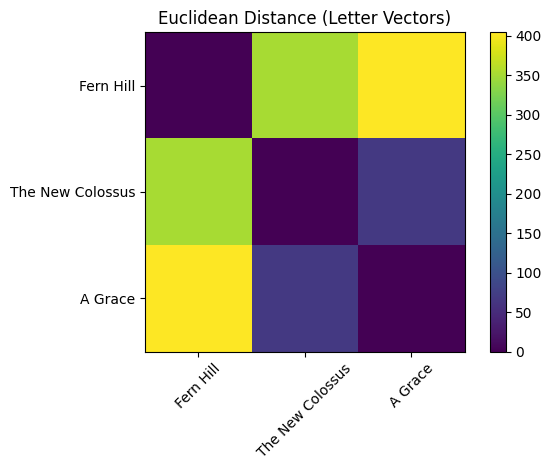

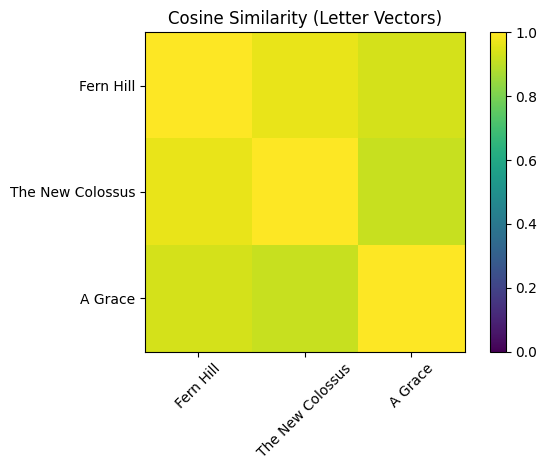


=== Q4: Word Frequency Vectors ===
                  the  of  a  and  was  in  on  with
Fern Hill          60  11  2   35   13  11   3     4
The New Colossus    6   3  2    1    0   0   0     3
A Grace             8   3  1    0    1   1   3     0

=== Q4: Euclidean Distance (Words) ===
                  Fern Hill  The New Colossus  A Grace
Fern Hill            0.0000           66.6033  65.2227
The New Colossus    66.6033            0.0000   5.0990
A Grace             65.2227            5.0990   0.0000

=== Q4: Cosine Similarity (Words) ===
                  Fern Hill  The New Colossus   A Grace
Fern Hill          1.000000          0.796632  0.819166
The New Colossus   0.796632          1.000000  0.833137
A Grace            0.819166          0.833137  1.000000


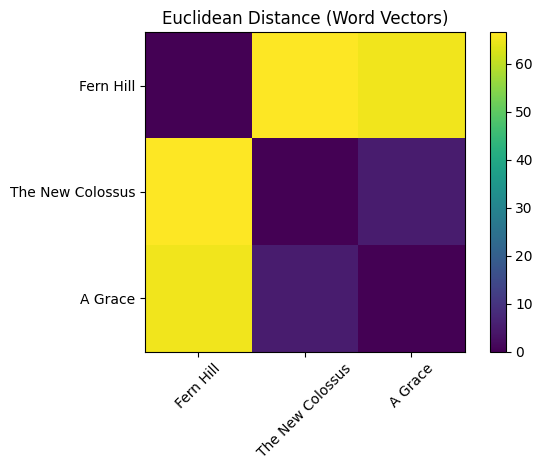

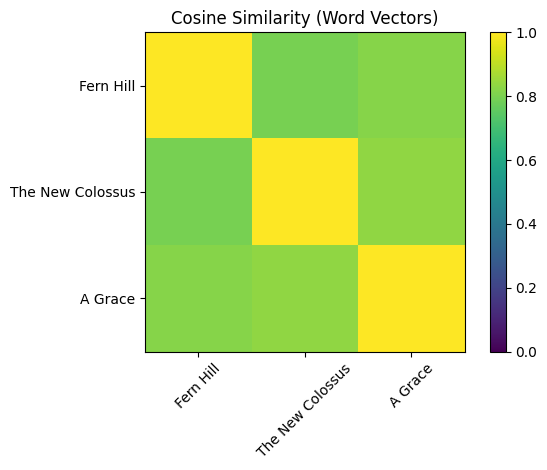


Analysis complete. ✅


In [4]:
# =============================================
# NLP & Math Analysis: Poem Similarity Task
# (Covers Q1–Q4)
# =============================================

import re
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from textwrap import dedent


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2000)
pd.set_option('display.expand_frame_repr', False)

# -------------------------
# Text data: 3 poems
# -------------------------
fern_hill = dedent("""
Now as I was young and easy under the apple boughs
About the lilting house and happy as the grass was green,
The night above the dingle starry,
Time let me hail and climb
Golden in the heydays of his eyes,

And honoured among wagons I was prince of the apple towns
And once below a time I lordly had the trees and leaves
Trail with daisies and barley
Down the rivers of the windfall light.

And as I was green and carefree, famous among the barns
About the happy yard and singing as the farm was home,
In the sun that is young once only,
Time let me play and be
Golden in the mercy of his means,
And green and golden I was huntsman and herdsman, the calves
Sang to my horn, the foxes on the hills barked clear and cold,
And the sabbath rang slowly
In the pebbles of the holy streams.

All the sun long it was running, it was lovely, the hay
Fields high as the house, the tunes from the chimneys, it was air
And playing, lovely and watery
And fire green as grass.
And nightly under the simple stars
As I rode to sleep the owls were bearing the farm away,
All the moon long I heard, blessed among stables, the nightjars
Flying with the ricks, and the horses
Flashing into the dark.

And then to awake, and the farm, like a wanderer white
With the dew, come back, the cock on his shoulder: it was all
Shining, it was Adam and maiden,
The sky gathered again
And the sun grew round that very day.
So it must have been after the birth of the simple light
In the first, spinning place, the spellbound horses walking warm
Out of the whinnying green stable
On to the fields of praise.

And honoured among foxes and pheasants by the gay house
Under the new made clouds and happy as the heart was long,
In the sun born over and over,
I ran my heedless ways,
My wishes raced through the house high hay
And nothing I cared, at my sky blue trades, that time allows
In all his tuneful turning so few and such morning songs
Before the children green and golden
Follow him out of grace,

Nothing I cared, in the lamb white days, that time would take me
Up to the swallow thronged loft by the shadow of my hand,
In the moon that is always rising,
Nor that riding to sleep
I should hear him fly with the high fields
And wake to the farm forever fled from the childless land.
Oh as I was young and easy in the mercy of his means,
Time held me green and dying
Though I sang in my chains like the sea.
""").strip()

new_colossus = dedent("""
Not like the brazen giant of Greek fame,
With conquering limbs astride from land to land;
Here at our sea-washed, sunset gates shall stand
A mighty woman with a torch, whose flame
Is the imprisoned lightning, and her name
Mother of Exiles. From her beacon-hand
Glows world-wide welcome; her mild eyes command
The air-bridged harbor that twin cities frame.
“Keep, ancient lands, your storied pomp!” cries she
With silent lips. “Give me your tired, your poor,
Your huddled masses yearning to breathe free,
The wretched refuse of your teeming shore.
Send these, the homeless, tempest-tossed to me,
I lift my lamp beside the golden door!”
""").strip()

a_grace = dedent("""
I’m tracing my ancestry to coal.

The line is exacting; it runs back thru
the life smell on my hands while I eat

making the taste of the meat not
what was meant by the beast it grew

to. The arithmetic of living, as it
burns down, implies a continuation

in the counting. The space between
one to one. I try on some skulls of anthracite.

None fit. My family is living on its own.
""").strip()

poems = {
    "Fern Hill": fern_hill,
    "The New Colossus": new_colossus,
    "A Grace": a_grace
}

# -------------------------
# Text cleaning functions
# -------------------------
def clean_text_for_letters(s: str) -> str:
    s = s.lower()
    s = re.sub(r'[^a-z]', '', s)
    return s

def tokenize_words(s: str) -> list:
    s = s.lower().replace("’", "'").replace("—", " ")
    s = re.sub(r"[^a-z'\s-]", " ", s)
    s = re.sub(r"[-]", " ", s)
    s = re.sub(r'\s+', ' ', s).strip()
    tokens = [re.sub(r"^'+|'+$", "", t) for t in s.split()]
    return [t for t in tokens if t]

alphabet = [chr(c) for c in range(ord('a'), ord('z')+1)]

# -------------------------
# Q1: Letter Frequency Vectors
# -------------------------
def letter_vector(text: str):
    s = clean_text_for_letters(text)
    counts = np.zeros(26, dtype=int)
    for ch in s:
        idx = ord(ch) - ord('a')
        if 0 <= idx < 26:
            counts[idx] += 1
    return counts

letter_vectors = {name: letter_vector(txt) for name, txt in poems.items()}
df_letters = pd.DataFrame(letter_vectors, index=alphabet).T
print("\n=== Q1: Letter Frequency Vectors ===")
print(df_letters)

# -------------------------
# Q2: Euclidean & Cosine Similarity
# -------------------------
def euclidean(u, v):
    return np.linalg.norm(np.array(u) - np.array(v))

def cosine_similarity(u, v):
    u, v = np.array(u, float), np.array(v, float)
    num = np.dot(u, v)
    den = np.linalg.norm(u) * np.linalg.norm(v)
    return num / den if den != 0 else np.nan

poem_names = list(poems.keys())
n = len(poem_names)
dist_mat = np.zeros((n,n))
cos_mat = np.zeros((n,n))

for i, j in itertools.product(range(n), range(n)):
    dist_mat[i,j] = euclidean(letter_vectors[poem_names[i]], letter_vectors[poem_names[j]])
    cos_mat[i,j] = cosine_similarity(letter_vectors[poem_names[i]], letter_vectors[poem_names[j]])

df_dist_letters = pd.DataFrame(dist_mat, index=poem_names, columns=poem_names)
df_cos_letters = pd.DataFrame(cos_mat, index=poem_names, columns=poem_names)

print("\n=== Q2: Euclidean Distance (Letters) ===")
print(df_dist_letters.round(4))
print("\n=== Q2: Cosine Similarity (Letters) ===")
print(df_cos_letters.round(6))

# Heatmaps
plt.figure()
plt.imshow(df_dist_letters, aspect='equal')
plt.title("Euclidean Distance (Letter Vectors)")
plt.colorbar()
plt.xticks(ticks=range(n), labels=poem_names, rotation=45)
plt.yticks(ticks=range(n), labels=poem_names)
plt.tight_layout()
plt.show()

plt.figure()
plt.imshow(df_cos_letters, aspect='equal', vmin=0, vmax=1)
plt.title("Cosine Similarity (Letter Vectors)")
plt.colorbar()
plt.xticks(ticks=range(n), labels=poem_names, rotation=45)
plt.yticks(ticks=range(n), labels=poem_names)
plt.tight_layout()
plt.show()

# -------------------------
# Q4: Word Frequency Vectors
# -------------------------
selected_words = ["the", "of", "a", "and", "was", "in", "on", "with"]

def word_vector(text, vocab):
    tokens = tokenize_words(text)
    counts = {w: 0 for w in vocab}
    for t in tokens:
        if t in counts:
            counts[t] += 1
    return np.array([counts[w] for w in vocab])

word_vectors = {name: word_vector(txt, selected_words) for name, txt in poems.items()}
df_words = pd.DataFrame(word_vectors, index=selected_words).T
print("\n=== Q4: Word Frequency Vectors ===")
print(df_words)

dist_mat_words = np.zeros((n,n))
cos_mat_words = np.zeros((n,n))

for i, j in itertools.product(range(n), range(n)):
    dist_mat_words[i,j] = euclidean(word_vectors[poem_names[i]], word_vectors[poem_names[j]])
    cos_mat_words[i,j] = cosine_similarity(word_vectors[poem_names[i]], word_vectors[poem_names[j]])

df_dist_words = pd.DataFrame(dist_mat_words, index=poem_names, columns=poem_names)
df_cos_words = pd.DataFrame(cos_mat_words, index=poem_names, columns=poem_names)

print("\n=== Q4: Euclidean Distance (Words) ===")
print(df_dist_words.round(4))
print("\n=== Q4: Cosine Similarity (Words) ===")
print(df_cos_words.round(6))

# Heatmaps
plt.figure()
plt.imshow(df_dist_words, aspect='equal')
plt.title("Euclidean Distance (Word Vectors)")
plt.colorbar()
plt.xticks(ticks=range(n), labels=poem_names, rotation=45)
plt.yticks(ticks=range(n), labels=poem_names)
plt.tight_layout()
plt.show()

plt.figure()
plt.imshow(df_cos_words, aspect='equal', vmin=0, vmax=1)
plt.title("Cosine Similarity (Word Vectors)")
plt.colorbar()
plt.xticks(ticks=range(n), labels=poem_names, rotation=45)
plt.yticks(ticks=range(n), labels=poem_names)
plt.tight_layout()
plt.show()

print("\nAnalysis complete. ✅")


In [6]:
# =============================================
# Q0 — Preprocessing for Poems
# Converts raw poems into:
#   (1) Letter-only cleaned string
#   (2) Letter-frequency vector (26-dim)
#   (3) Tokenized text
#   (4) Word-frequency vector (8-dim)
# =============================================

import re
import numpy as np
import pandas as pd
from textwrap import dedent

# -------------------------
# Poems
# -------------------------
fern_hill = dedent("""
Now as I was young and easy under the apple boughs
About the lilting house and happy as the grass was green,
The night above the dingle starry,
Time let me hail and climb
Golden in the heydays of his eyes,

And honoured among wagons I was prince of the apple towns
And once below a time I lordly had the trees and leaves
Trail with daisies and barley
Down the rivers of the windfall light.

And as I was green and carefree, famous among the barns
About the happy yard and singing as the farm was home,
In the sun that is young once only,
Time let me play and be
Golden in the mercy of his means,
And green and golden I was huntsman and herdsman, the calves
Sang to my horn, the foxes on the hills barked clear and cold,
And the sabbath rang slowly
In the pebbles of the holy streams.

All the sun long it was running, it was lovely, the hay
Fields high as the house, the tunes from the chimneys, it was air
And playing, lovely and watery
And fire green as grass.
And nightly under the simple stars
As I rode to sleep the owls were bearing the farm away,
All the moon long I heard, blessed among stables, the nightjars
Flying with the ricks, and the horses
Flashing into the dark.

And then to awake, and the farm, like a wanderer white
With the dew, come back, the cock on his shoulder: it was all
Shining, it was Adam and maiden,
The sky gathered again
And the sun grew round that very day.
So it must have been after the birth of the simple light
In the first, spinning place, the spellbound horses walking warm
Out of the whinnying green stable
On to the fields of praise.

And honoured among foxes and pheasants by the gay house
Under the new made clouds and happy as the heart was long,
In the sun born over and over,
I ran my heedless ways,
My wishes raced through the house high hay
And nothing I cared, at my sky blue trades, that time allows
In all his tuneful turning so few and such morning songs
Before the children green and golden
Follow him out of grace,

Nothing I cared, in the lamb white days, that time would take me
Up to the swallow thronged loft by the shadow of my hand,
In the moon that is always rising,
Nor that riding to sleep
I should hear him fly with the high fields
And wake to the farm forever fled from the childless land.
Oh as I was young and easy in the mercy of his means,
Time held me green and dying
Though I sang in my chains like the sea.
""").strip()

new_colossus = dedent("""
Not like the brazen giant of Greek fame,
With conquering limbs astride from land to land;
Here at our sea-washed, sunset gates shall stand
A mighty woman with a torch, whose flame
Is the imprisoned lightning, and her name
Mother of Exiles. From her beacon-hand
Glows world-wide welcome; her mild eyes command
The air-bridged harbor that twin cities frame.
“Keep, ancient lands, your storied pomp!” cries she
With silent lips. “Give me your tired, your poor,
Your huddled masses yearning to breathe free,
The wretched refuse of your teeming shore.
Send these, the homeless, tempest-tossed to me,
I lift my lamp beside the golden door!”
""").strip()

a_grace = dedent("""
I’m tracing my ancestry to coal.

The line is exacting; it runs back thru
the life smell on my hands while I eat

making the taste of the meat not
what was meant by the beast it grew

to. The arithmetic of living, as it
burns down, implies a continuation

in the counting. The space between
one to one. I try on some skulls of anthracite.

None fit. My family is living on its own.
""").strip()

poems = {
    "Fern Hill": fern_hill,
    "The New Colossus": new_colossus,
    "A Grace": a_grace
}

# -------------------------
# Functions for Q0
# -------------------------

def clean_text_for_letters(s: str) -> str:
    """Return a string containing only a–z lowercase letters."""
    s = s.lower()
    return re.sub(r'[^a-z]', '', s)

def letter_vector(text: str):
    """26-dim letter frequency vector."""
    s = clean_text_for_letters(text)
    vec = np.zeros(26, dtype=int)
    for ch in s:
        vec[ord(ch) - ord('a')] += 1
    return vec

def tokenize_words(s: str):
    """Basic tokenizer for English words."""
    s = s.lower()
    s = s.replace("’", "'").replace("—", " ")
    s = re.sub(r"[^a-z'\s-]", " ", s)
    s = re.sub(r"[-]", " ", s)
    s = re.sub(r'\s+', ' ', s).strip()
    tokens = [re.sub(r"^'+|'+$", "", t) for t in s.split()]
    return [t for t in tokens if t]

def word_vector(text: str, vocab):
    """Count only selected vocabulary words."""
    tokens = tokenize_words(text)
    counts = {w: 0 for w in vocab}
    for t in tokens:
        if t in counts:
            counts[t] += 1
    return np.array([counts[w] for w in vocab], dtype=int)


# -------------------------
# Apply preprocessing
# -------------------------

alphabet = [chr(c) for c in range(ord('a'), ord('z') + 1)]
selected_words = ["the", "of", "a", "and", "was", "in", "on", "with"]

# Letter vectors
letter_vectors = {name: letter_vector(txt) for name, txt in poems.items()}
df_letters = pd.DataFrame(letter_vectors, index=alphabet).T

# Word vectors
word_vectors = {name: word_vector(txt, selected_words) for name, txt in poems.items()}
df_words = pd.DataFrame(word_vectors, index=selected_words).T

# -------------------------
# Output
# -------------------------
print("\n=== Cleaned letter-only text (showing first 200 chars) ===")
for name, txt in poems.items():
    cleaned = clean_text_for_letters(txt)
    print(f"\n{name}:\n{cleaned[:200]}...")

print("\n\n=== 26-dim Letter Frequency Vectors ===")
print(df_letters)

print("\n\n=== Tokenized Sample (First 20 tokens) ===")
for name, txt in poems.items():
    tokens = tokenize_words(txt)
    print(f"\n{name}: {tokens[:20]}")

print("\n\n=== 8-dim Word Frequency Vectors ===")
print(df_words)

print("\nQ0 preprocessing complete.")



=== Cleaned letter-only text (showing first 200 chars) ===

Fern Hill:
nowasiwasyoungandeasyundertheappleboughsabouttheliltinghouseandhappyasthegrasswasgreenthenightabovethedinglestarrytimeletmehailandclimbgoldenintheheydaysofhiseyesandhonouredamongwagonsiwasprinceofthea...

The New Colossus:
notlikethebrazengiantofgreekfamewithconqueringlimbsastridefromlandtolandhereatourseawashedsunsetgatesshallstandamightywomanwithatorchwhoseflameistheimprisonedlightningandhernamemotherofexilesfromherbe...

A Grace:
imtracingmyancestrytocoalthelineisexactingitrunsbackthruthelifesmellonmyhandswhileieatmakingthetasteofthemeatnotwhatwasmeantbythebeastitgrewtothearithmeticoflivingasitburnsdownimpliesacontinuationinth...


=== 26-dim Letter Frequency Vectors ===
                    a   b   c   d    e   f   g    h    i  j   k   l   m    n    o   p  q   r    s    t   u   v   w  x   y  z
Fern Hill         176  28  26  91  217  38  65  145  115  1  13  93  51  156  109  24  0  89  130  141  40  11  49  2  5